In [1]:
library(brms) #predictability: Double hierearchical model
library(MCMCglmm) #HPDinterval
library(dplyr) #%>%
library(lmerTest) #lmer
#library(MuMIn) #r2
#library(merTools) #sim
library(sjPlot) #plot coeff
library(ggplot2) #ylim in plot
library(rstan) #model diagnostic

Warning message:
"le package 'brms' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Rcpp

Warning message:
"le package 'Rcpp' a été compilé avec la version R 4.1.2"
Loading 'brms' package (version 2.16.3). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attachement du package : 'brms'


L'objet suivant est masqué depuis 'package:stats':

    ar


Warning message:
"le package 'MCMCglmm' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Matrix

Warning message:
"le package 'Matrix' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : coda

Warning message:
"le package 'coda' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : ape

Warning message:
"le package 'ape' a été compilé avec la version R 4.1.2"

Attachement du package : 'MCMCglmm'


L'objet suivant est masqué depuis 'pac

In [2]:
library(parallel)
my.cores = detectCores()-1 #minus 1 to avoid bocking the computer
my.cores

[1] 11

In [3]:
#df[rowSums(is.na(df)) > 0,]

# Behavioural syndrome

In [5]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
#df = read.csv(file.path(path_,'df_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df = read.csv(file.path(path_,'df_BS.csv'), header = TRUE, sep = ",")

df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID)
df$TrackingSystemID = as.factor(df$TrackingSystemID)
df$level = as.factor(df$level) 
df$FoodPenID = as.factor(df$FoodPenID) 
df$CLASS = as.factor(df$CLASS) 
df$Treatment = as.factor(df$Treatment)

#scale: mean-centering of the environmental variable so that intercepts reflect average values for the HenID and ind. 
#df$temperature_C_avg_scale = scale(df$temperature_C_avg, center=TRUE, scale=TRUE)

#setting reference group
contrasts(df$Treatment)
df <- df %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
contrasts(df$Treatment)

contrasts(df$CLASS)
df <- df %>% mutate(CLASS = relevel(CLASS, ref = "LEXP"))
contrasts(df$CLASS)
print(dim(df))
summary(df)

df$WentinWG = as.integer(df$WentinWG)
df$Sleeping_Uppest = as.integer(df$Sleeping_Uppest)

df$KBFInterp = df$KBF_interp
df$weightInterp = df$weight_interp


dim(df)
df_time = df[df$BS_type=='time',]
dim(df_time)

df_LP2 = df[df$BS_type=='LP2',]
dim(df_LP2)

df_LP10 = df[df$BS_type=='LP10',]
dim(df_LP10)

df_cold = df[df$BS_type=='cold',]
dim(df_cold)

df_vacc = df[df$BS_type=='TypicalVaccinationDay',]
dim(df_vacc)

df_AC = df[df$across_context==1,]
dim(df_AC)

,TRAN
OFH,0
TRAN,1


,OFH
TRAN,0
OFH,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


[1] 4892   22


             TrackingSystemID        level           DOA             DIB       
 TrackingSystem 10-12:1848    2021-01-17: 159   Min.   :179.0   Min.   : 61.0  
 TrackingSystem 3-5  :1864    2021-04-18: 159   1st Qu.:216.0   1st Qu.: 98.0  
 TrackingSystem 8-9  :1180    2021-01-24: 158   Median :284.0   Median :166.0  
                              2021-05-07: 157   Mean   :285.2   Mean   :167.2  
                              2020-12-06: 156   3rd Qu.:340.0   3rd Qu.:222.0  
                              2020-12-20: 156   Max.   :410.0   Max.   :292.0  
                              (Other)   :3947                                  
         FoodPenID      BS_type          Treatment           CLASS     
 FoodPenID1-4 :1225   Length:4892        TRAN:2413   LEXP       : 916  
 FoodPenID5-8 :1206   Class :character   OFH :2479   MEXP       :1134  
 FoodPenID9-12:2461   Mode  :character               NewAfterEpi:1480  
                                                     REXP       :1362  


[1] 4892   24

[1] 3196   24

[1] 466  24

[1] 450  24

[1] 312  24

[1] 468  24

[1] 614  24

# Choose Data & Saving name

In [6]:
saving_name = 'ELS'
#choose you dataframe
df = df_LP2

In [7]:
df_LP2

,TrackingSystemID,level,DOA,DIB,FoodPenID,BS_type,Treatment,CLASS,PenID,temperature_C_avg,...,weight_interp,WentinWG,mid_cum_Z4_h_Morning,Sleeping_Uppest,vertical_travel_distance_fulllight_perinsideh,food_sameDurTiming_r50_final,food_sameDurTiming_r50_AB_final,food_sameDurTiming_r50_AP_final,KBFInterp,weightInterp
,<fct>,<fct>,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,...,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TrackingSystem 10-12,2020-11-29,179,61,FoodPenID9-12,LP2,TRAN,REXP,pen10,2.166667,...,1747.700,1,4.028333,1,6.3664230,0.62,-0.20,-0.19,0.000000,1747.700
2,TrackingSystem 10-12,2020-12-06,186,68,FoodPenID9-12,LP2,TRAN,REXP,pen10,2.166667,...,1766.017,1,4.046389,1,5.4180364,0.22,0.25,0.05,0.000000,1766.017
3,TrackingSystem 10-12,2020-12-13,193,75,FoodPenID9-12,LP2,TRAN,REXP,pen10,5.833333,...,1784.333,1,3.921667,1,7.0372977,0.39,-0.23,-0.25,0.000000,1784.333
12,TrackingSystem 10-12,2020-11-29,179,61,FoodPenID9-12,LP2,TRAN,MEXP,pen10,2.166667,...,1609.929,1,4.490000,0,4.3871741,-0.15,0.02,0.30,27.142857,1609.929
13,TrackingSystem 10-12,2020-12-06,186,68,FoodPenID9-12,LP2,TRAN,MEXP,pen10,2.166667,...,1644.379,1,4.826111,0,7.1520811,-0.15,-0.12,0.16,23.809524,1644.379
14,TrackingSystem 10-12,2020-12-13,193,75,FoodPenID9-12,LP2,TRAN,MEXP,pen10,5.833333,...,1678.829,1,5.086944,0,5.1876189,0.01,0.02,0.43,20.476190,1678.829
44,TrackingSystem 10-12,2020-11-29,179,61,FoodPenID9-12,LP2,TRAN,MEXP,pen10,2.166667,...,1870.643,1,4.340000,1,2.8273810,0.60,0.12,0.56,3.142857,1870.643
45,TrackingSystem 10-12,2020-12-06,186,68,FoodPenID9-12,LP2,TRAN,MEXP,pen10,2.166667,...,1900.793,1,4.180000,0,3.4561923,0.28,0.34,0.14,6.809524,1900.793
46,TrackingSystem 10-12,2020-12-13,193,75,FoodPenID9-12,LP2,TRAN,MEXP,pen10,5.833333,...,1930.943,1,3.708056,0,3.4216467,0.47,-0.21,0.06,10.476190,1930.943


# Multivariate models with correlated multilevel structure

#Get information on all parameters (and parameter classes) for which priors may be specified including default priors:
get_prior(formula = scale(food_related_behavior_final_inv_cst) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB)+ (1|a|HenID), 
          data=df_time, family = gaussian())

In [8]:
#Get information on all parameters (and parameter classes) for which priors may be specified including default priors:
FA = bf(scale(food_sameDurTiming_r50_final) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB)+ (1|a|HenID),
       family=gaussian)
VTD = bf(scale(vertical_travel_distance_fulllight_perinsideh) ~ Treatment + scale(weightInterp)+scale(KBFInterp)+scale(DIB) +(1|a|HenID),
        family=gaussian)
TM = bf(mid_cum_Z4_h_Morning ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1|a|HenID),
       family=Gamma(link='log'))
SD = bf(Sleeping_Uppest ~ Treatment + scale(weightInterp)+scale(KBFInterp) + scale(DIB) + (1|a|HenID), 
        family = bernoulli(link = "logit")) #binary logistic regression
WG = bf(WentinWG ~ Treatment+scale(weightInterp)+scale(KBFInterp) + scale(DIB)+(1|a|HenID), 
        family = bernoulli(link = "logit")) #binary logistic regression
get_prior(formula = FA + VTD + TM + SD + WG +
                    set_rescor(FALSE), 
          data=df, family = bernoulli())

prior,class,coef,group,resp,dpar,nlpar,bound,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,default
lkj(1),cor,,,,,,,default
,cor,,HenID,,,,,default
,Intercept,,,,,,,default
,b,,,midcumZ4hMorning,,,,default
,b,scaleDIB,,midcumZ4hMorning,,,,default
,b,scaleKBFInterp,,midcumZ4hMorning,,,,default
,b,scaleweightInterp,,midcumZ4hMorning,,,,default
,b,TreatmentOFH,,midcumZ4hMorning,,,,default


In [7]:
iter_ = 1000000
iter_wu = 600000
FA = bf(scale(food_sameDurTiming_r50_final) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB)+ (1|a|HenID),
       family=gaussian)
VTD = bf(scale(vertical_travel_distance_fulllight_perinsideh) ~ Treatment + scale(weightInterp)+scale(KBFInterp)+scale(DIB) +(1|a|HenID),
        family=gaussian)
TM = bf(mid_cum_Z4_h_Morning ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1|a|HenID),
       family=Gamma(link='log'))
SD = bf(Sleeping_Uppest ~ Treatment + scale(weightInterp)+scale(KBFInterp) + scale(DIB) + (1|a|HenID), 
        family = bernoulli(link = "logit")) #binary logistic regression
WG = bf(WentinWG ~ Treatment+scale(weightInterp)+scale(KBFInterp) + scale(DIB)+(1|a|HenID), 
        family = bernoulli(link = "logit")) #binary logistic regression
#by default, the first category will serve as the reference (https://discourse.mc-stan.org/t/example-with-family-multinomial/8707/3)
#so latency_1_Zone_15mn_3h will be left out and latency_1_Zone_15mn_3hOPP will be shown
#WG = bf(latency_1_Zone_15mn_3h_bind | trials(size) ~ Treatment +scale(DIB)+scale(weight_interp)+scale(KBF_interp)+(1|a|HenID), 
#        family = multinomial()) 
#NV = bf(nbr_visit_Z4_Morning_more60sec ~ Treatment +scale(weight_interp) + scale(DIB) + scale(KBF_interp) +(1|a|HenID),
#        family=poisson)
Multi_DHGLM = brm(FA + VTD + TM + SD + WG +
                    set_rescor(FALSE),
                    data = df,
                    iter = iter_, warmup = iter_wu, thin = 50,
                    chains = 4, cores =my.cores, seed = 12345)
summary(Multi_DHGLM) #95% Posterior HPD Interval
#save model (from: https://bookdown.org/ajkurz/Statistical_Rethinking_recoded/horoscopes-insights.html#save-your-model-fits)
save(Multi_DHGLM, file = file.path(path_, paste0(saving_name, '_Multi_DHGLM_all_var_FINAL.rda')))
#load(file.path(path_,"Multi_DHGLM_allvar.rda")) #do not put modelreload = load(file.path(path_,"Multi_DHGLM_allvar_Food2.rda"))

Compiling Stan program...

Start sampling



 Family: MV(gaussian, gaussian, bernoulli, bernoulli) 
  Links: mu = identity; sigma = identity
         mu = identity; sigma = identity
         mu = logit
         mu = logit 
Formula: scale(food_sameDurTiming_r50_final) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1 | a | HenID) 
         scale(vertical_travel_distance_fulllight_perinsideh) ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1 | a | HenID) 
         Sleeping_Uppest ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1 | a | HenID) 
         WentinWG ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1 | a | HenID) 
   Data: df (Number of observations: 466) 
  Draws: 4 chains, each with iter = 250000; warmup = 150000; thin = 4;
         total post-warmup draws = 1e+05

Group-Level Effects: 
~HenID (Number of levels: 156) 
                                                                                                       Estimat

In [12]:
dim(df)

[1] 466  24

In [13]:
df

,TrackingSystemID,level,DOA,DIB,FoodPenID,BS_type,Treatment,CLASS,PenID,temperature_C_avg,...,weight_interp,WentinWG,mid_cum_Z4_h_Morning,Sleeping_Uppest,vertical_travel_distance_fulllight_perinsideh,food_sameDurTiming_r50_final,food_sameDurTiming_r50_AB_final,food_sameDurTiming_r50_AP_final,KBFInterp,weightInterp
,<fct>,<fct>,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,...,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TrackingSystem 10-12,2020-11-29,179,61,FoodPenID9-12,LP2,TRAN,REXP,pen10,2.166667,...,1747.700,1,4.028333,1,6.3664230,0.62,-0.20,-0.19,0.000000,1747.700
2,TrackingSystem 10-12,2020-12-06,186,68,FoodPenID9-12,LP2,TRAN,REXP,pen10,2.166667,...,1766.017,1,4.046389,1,5.4180364,0.22,0.25,0.05,0.000000,1766.017
3,TrackingSystem 10-12,2020-12-13,193,75,FoodPenID9-12,LP2,TRAN,REXP,pen10,5.833333,...,1784.333,1,3.921667,1,7.0372977,0.39,-0.23,-0.25,0.000000,1784.333
12,TrackingSystem 10-12,2020-11-29,179,61,FoodPenID9-12,LP2,TRAN,MEXP,pen10,2.166667,...,1609.929,1,4.490000,0,4.3871741,-0.15,0.02,0.30,27.142857,1609.929
13,TrackingSystem 10-12,2020-12-06,186,68,FoodPenID9-12,LP2,TRAN,MEXP,pen10,2.166667,...,1644.379,1,4.826111,0,7.1520811,-0.15,-0.12,0.16,23.809524,1644.379
14,TrackingSystem 10-12,2020-12-13,193,75,FoodPenID9-12,LP2,TRAN,MEXP,pen10,5.833333,...,1678.829,1,5.086944,0,5.1876189,0.01,0.02,0.43,20.476190,1678.829
44,TrackingSystem 10-12,2020-11-29,179,61,FoodPenID9-12,LP2,TRAN,MEXP,pen10,2.166667,...,1870.643,1,4.340000,1,2.8273810,0.60,0.12,0.56,3.142857,1870.643
45,TrackingSystem 10-12,2020-12-06,186,68,FoodPenID9-12,LP2,TRAN,MEXP,pen10,2.166667,...,1900.793,1,4.180000,0,3.4561923,0.28,0.34,0.14,6.809524,1900.793
46,TrackingSystem 10-12,2020-12-13,193,75,FoodPenID9-12,LP2,TRAN,MEXP,pen10,5.833333,...,1930.943,1,3.708056,0,3.4216467,0.47,-0.21,0.06,10.476190,1930.943


In [14]:
dim(loo2)

[1] 400000    466

Warning message:
"Found 20 observations with a pareto_k > 0.7 in model 'Multi_DHGLM'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. "



Computed from 400000 by 466 log-likelihood matrix

         Estimate   SE
elpd_loo  -1385.7 33.8
p_loo       386.4 15.5
looic      2771.5 67.6
------
Monte Carlo SE of elpd_loo is NA.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     300   64.4%   27011     
 (0.5, 0.7]   (ok)       146   31.3%   1612      
   (0.7, 1]   (bad)       18    3.9%   223       
   (1, Inf)   (very bad)   2    0.4%   66        
See help('pareto-k-diagnostic') for details.

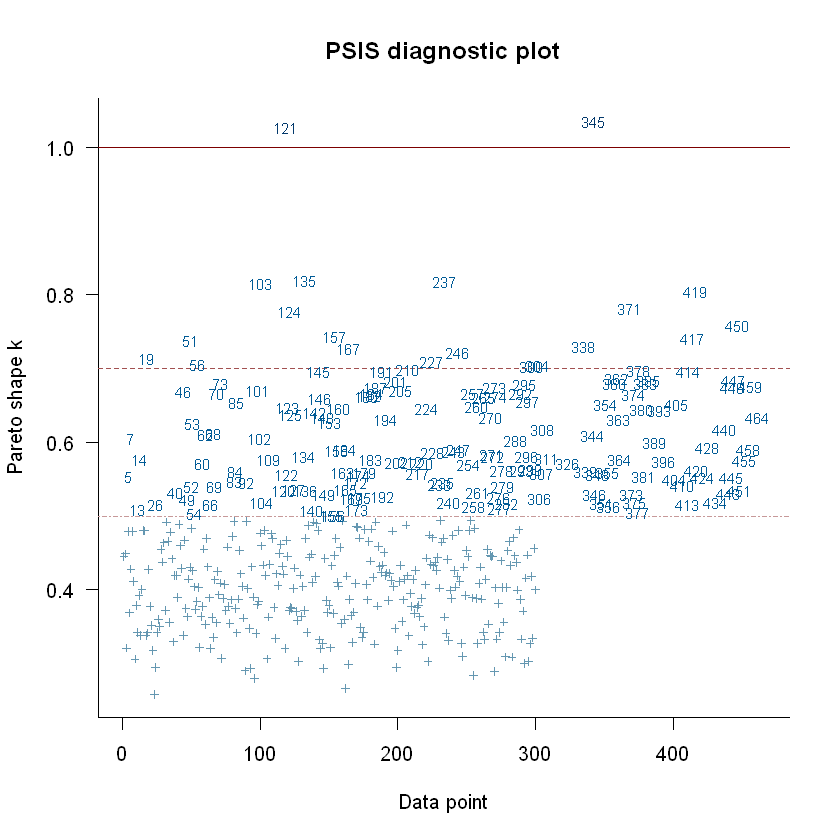

In [11]:
loo2 = loo(Multi_DHGLM)
loo2
plot(loo2, label_points = TRUE)

In [8]:
############## Loo-cv and waic ##############
#conditional_effects(Multi_DHGLM)
Multi_DHGLM = add_criterion(Multi_DHGLM, criterion=c('waic','loo'), file=file.path(path_,paste0(saving_name,'_Multi_DHGLM_allvar_FINAL')))
#head(get_variables(modelPred),10)
print('----------------------- waic')
print(Multi_DHGLM$criteria$waic)

print('----------------------- loo-cv')
#approximative leave-one-out cross validation
print(Multi_DHGLM$criteria$loo)

print('----------------------- loo2')
#check highly influential observations
#https://cran.r-project.org/web/packages/loo/vignettes/loo2-moment-matching.html
#https://cran.r-project.org/web/packages/loo/vignettes/loo2-example.html
#"If we had a well-specified model we would expect the estimated effective number of parameters (p_loo) to be smaller than or 
#similar to the total number of parameters in the model."
loo2 = loo(Multi_DHGLM, moment_match = TRUE)
loo2
plot(loo2, label_points = TRUE)

Warning message:
"
320 (68.7%) p_waic estimates greater than 0.4. We recommend trying loo instead."
Warning message:
"Found 20 observations with a pareto_k > 0.7 in model 'Multi_DHGLM'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. "


ERROR: Error in saveRDS(x, file = file): erreur d'écriture vers la connexion


### saving some outputs

In [ ]:
#coefficient of variation in predictability” (CVP)
#log.norm.res = exp(posterior_samples(Multi_DHGLM)$"sd_HenID__sigma_Intercept"^2)
#CVP = sqrt(log.norm.res-1)
#mean(CVP);HPDinterval(as.mcmc(CVP),0.95)

#posterior samples dimensionality of the dataframe:
#nrw=(iter-warup)/thin * chain
#ncol=#param to estimate
prior_summary(Multi_DHGLM)

#all data, sd in python
#extract samples (draw) from the posterior distribution, including all variables
#df_pred = posterior_samples(modelPred) #depreciated but still work well. we will instead use:
colnames(posterior_samples(Multi_DHGLM))[1:30]
df_pred = as_draws(Multi_DHGLM)
length(df_pred[[1]]) #nbr param
length(df_pred[[1]][[1]]) #nbr posterior samples we got per chain
write.csv(df_pred, file.path(path_,paste0(saving_name,'_BRMS_BS_pred_allvar_FINAL.csv')), row.names = TRUE)

#only mean and CI from R
df_pred = posterior_samples(Multi_DHGLM)
dim(df_pred) # nbr posterior samles we got, #param
#--> (1250, 4044) ou (5000, 1011)
df_mean = colMeans(df_pred)
df_CI = HPDinterval(as.mcmc(df_pred))
dim(df_CI)
write.csv(df_CI, file.path(path_,paste0(saving_name,'_df_CI_BRMS_BS_pred_allvar_FINAL.csv')), row.names = TRUE)
write.csv(df_mean, file.path(path_,paste0(saving_name,'_df_mean_BRMS_BS_pred_allvar_FINAL.csv')), row.names = TRUE)
dim(df)

In [ ]:
#mean population-level estimates
fixef(Multi_DHGLM)
p1 = plot_model(Multi_DHGLM,  show.values = TRUE, title='Population-Level Effects', 
            rm.terms = c('FoodPenIDFoodPenID9M12','FoodPenIDFoodPenID5M8'), #TreatmentOFH
                type = "est", colors = c("red3", "forestgreen"))+ ylim(-.6, .6)
ggsave(file.path(path_,paste0(saving_name,'_Multi_fixedestimate_withOFH_FINAL.png')), plot=p1, height=5, width=12, dpi=600) 

p1 = plot_model(Multi_DHGLM,  show.values = TRUE, title='Population-Level Effects', 
            rm.terms = c('TreatmentOFH','FoodPenIDFoodPenID9M12','FoodPenIDFoodPenID5M8'), #TreatmentOFH
                type = "est", colors = c("red3", "forestgreen"))+ ylim(-.6, .6)
ggsave(file.path(path_,paste0(saving_name,'_Multi_fixedestimate_withoutOFH_FINAL.png')), plot=p1, height=5, width=12, dpi=600) 
#or in terms of density: https://www.rensvandeschoot.com/tutorials/generalised-linear-models-with-brms/
#stanplot(Multi_DHGLM, type = "areas", prob = 0.95)
#darkgreen, forestgreen ; firebrick, red3
#ex of interpretation: https://www.rensvandeschoot.com/tutorials/generalised-linear-models-with-brms/

In [ ]:
colnames(posterior_samples(Multi_DHGLM))[1:60]
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT = posterior_samples(Multi_DHGLM)[,'cor_HenID__scalefoodsameDurTimingr50final_Intercept__scaleverticaltraveldistancefulllightperinsideh_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation food behavior & vertical travelled distance",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

In [ ]:
#colnames(posterior_samples(Multi_DHGLM))[1:60]
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT = posterior_samples(Multi_DHGLM)[,'cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation sleep up & vertical travelled distance",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

In [ ]:
#colnames(posterior_samples(Multi_DHGLM))[1:60]
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT = posterior_samples(Multi_DHGLM)[,'cor_HenID__scalefoodsameDurTimingr50final_Intercept__WentinWG_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation food behavior & went outside",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

In [ ]:
#colnames(posterior_samples(Multi_DHGLM))[1:60]
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT = posterior_samples(Multi_DHGLM)[,'cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation went outside & vertical travelled distance",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

In [ ]:
#colnames(posterior_samples(Multi_DHGLM))[1:60]
#plot the among individual correlation of behaviors: Correlation between mean behavioral expression of MVT1 and MVT2, where the dashedlines 
#indicate the 95% credible interval of the posterior distribution.
food_VT = posterior_samples(Multi_DHGLM)[,'cor_HenID__scalefoodsameDurTimingr50final_Intercept__SleepingUppest_Intercept']
#same:
#food_VT <-posterior_samples(Multi_DHGLM)$cor_HenID__foodrelatedbehaviorfinalinvcst_Intercept__scaleVTD_Intercept
par(mar=c(2, 2, 3, 2))
plot(density(food_VT),main="Correlation went outside & vertical travelled distance",xlab="",ylab="",cex.main=0.8)
abline(v=0,col="red",lwd=2)
abline(v=mean(food_VT),col="black",lwd=2)
abline(v=HPDinterval(as.mcmc(food_VT))[1],col="black",lty=2)
abline(v=HPDinterval(as.mcmc(food_VT))[2],col="black",lty=2)
HPDinterval(as.mcmc(food_VT))

### model diagnostic

In [9]:
load(file.path(path_,paste0(saving_name, '_Multi_DHGLM_all_var_FINAL.rda')))

In [ ]:
############## Loo-cv and waic ##############
#conditional_effects(Multi_DHGLM)
Multi_DHGLM = add_criterion(Multi_DHGLM, criterion=c('waic','loo'), file=file.path(path_,paste0(saving_name,'_Multi_DHGLM_allvar_FINAL')))
#head(get_variables(modelPred),10)
print('----------------------- waic')
print(Multi_DHGLM$criteria$waic)

print('----------------------- loo-cv')
#approximative leave-one-out cross validation
print(Multi_DHGLM$criteria$loo)

print('----------------------- loo2')
#check highly influential observations
#https://cran.r-project.org/web/packages/loo/vignettes/loo2-moment-matching.html
#https://cran.r-project.org/web/packages/loo/vignettes/loo2-example.html
#"If we had a well-specified model we would expect the estimated effective number of parameters (p_loo) to be smaller than or 
#similar to the total number of parameters in the model."
loo2 = loo(Multi_DHGLM, moment_match = TRUE)
loo2
plot(loo2, label_points = TRUE)

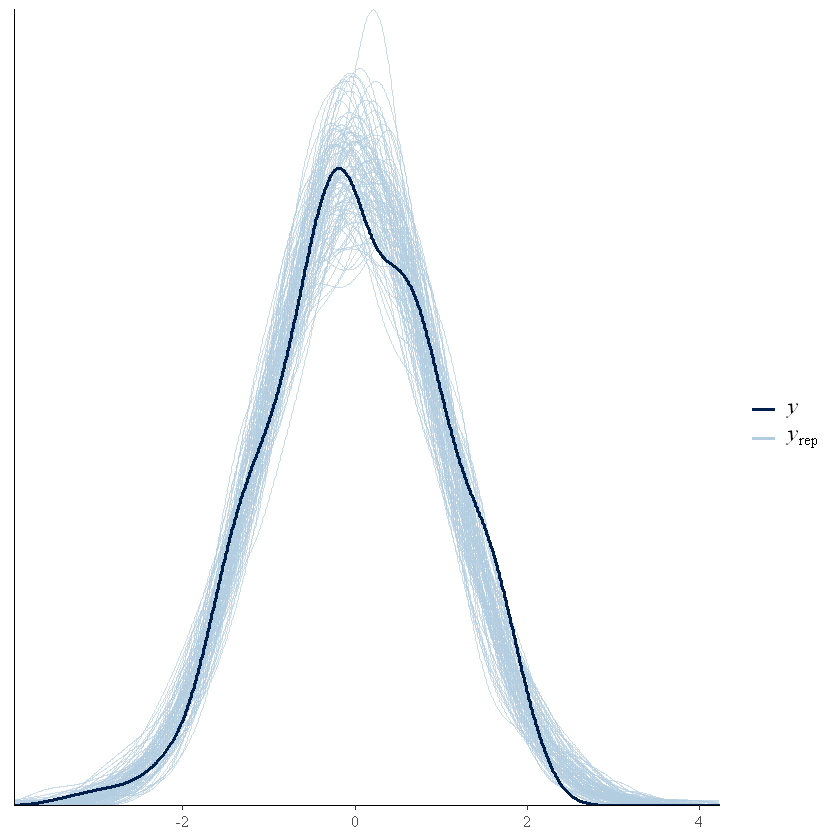

ERROR: Error: Invalid argument 'resp'. Valid response variables are: 'scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'SleepingUppest', 'WentinWG'


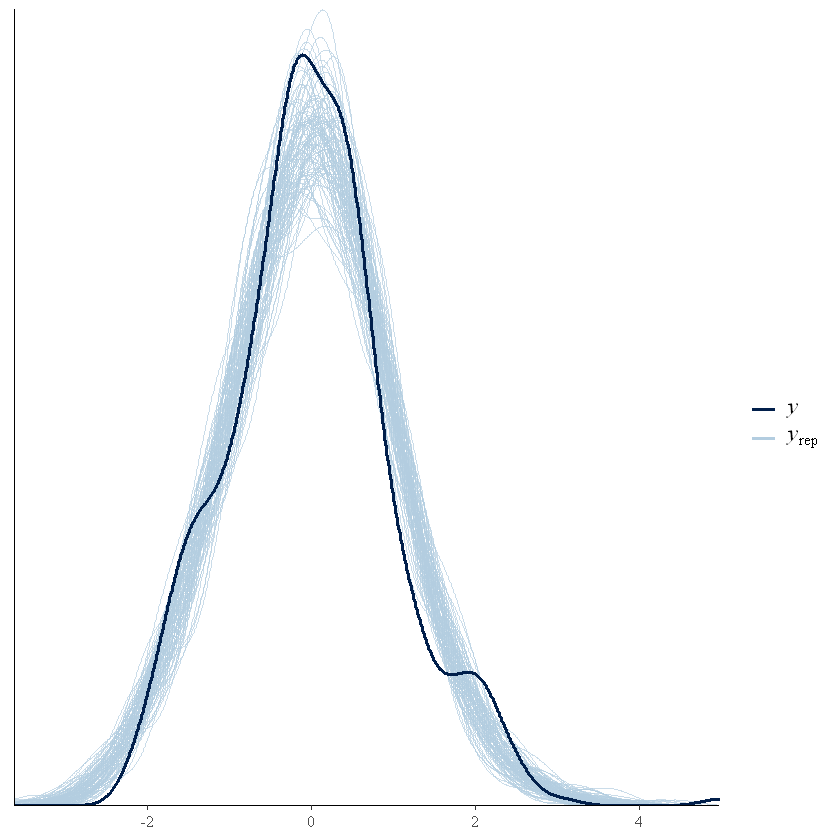

In [10]:
############## posterior predictive check ##############
pp_check(Multi_DHGLM, resp='scalefoodsameDurTimingr50final',ndraws = 100)
pp_check(Multi_DHGLM, resp='scaleverticaltraveldistancefulllightperinsideh',ndraws = 100)
pp_check(Multi_DHGLM, resp='midcumZ4hMorning',ndraws = 100)
pp_check(Multi_DHGLM, resp='SleepingUppest',ndraws = 100)
pp_check(Multi_DHGLM, resp='WentinWG',ndraws = 100)

In [ ]:
pp_check(Multi_DHGLM, type = "loo_pit_overlay")

In [ ]:
############## trace plot ##############
#variables(Multi_DHGLM) #extract parameter names
length(variables(Multi_DHGLM)) #nbr of param
li_param = variables(Multi_DHGLM)
cond = lapply(li_param, function(x) !startsWith(x, 'r_'))
li_param_notR = li_param[unlist(cond)]
length(li_param_notR) #nbr param without random intercepts
li_param_notR
              
#44 plots (I guess its all param without random effects. 44 plots, 46 param withour r_, so 2 are missing: probably lp & shape
             #from the gamma family)
#mcmc_plot(Multi_DHGLM, type = "trace", variable=li_param_notR)#previously: stanplot #to small plots
plot(Multi_DHGLM)

In [ ]:
############## Gelman-Rubin diagnostic ##############
#is automatically given in the summary of brms under the column Rhat!
#lets give for all except random intercept (else 1011 plot!!)
modelposterior = as.mcmc(Multi_DHGLM) # with as.mcmc() we can use all the CODA package cvg statistics & plotting options
gelman.diag(modelposterior[, li_param_notR])
gelman.plot(modelposterior[, li_param_notR])

In [ ]:
############## Geweke diagnostic ##############
#shows the z-scores for a test of equality of means between the first and last parts of each chain, which should be <1.96
geweke.diag(modelposterior[, li_param_notR])
geweke.plot(modelposterior[, li_param_notR])
#sd_HenID__foodsameDurTimingr50final_Intercept : BAD: 2.61144, with more iterations we have: 0.94243 
#cor_HenID__foodsameDurTimingr50final_Intercept__SleepingUppest_Intercept : 2.11821, with more iterations we have: 1.18771
#others too
#each [[*]] correspond to chain *
#sigma_scaleverticaltraveldistancefulllightperinsideh stil to large, b_SleepingUppest_TreatmentOFH too etc

In [ ]:
############## do the chains exhibit a strong degree of autocorrelation? ##############
#if we want to do, read this paper first On thinning of chains in MCMC
cond = lapply(li_param, function(x) startsWith(x, 'cor_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_[1:5])
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_[5:length(li_param_)])

cond = lapply(li_param, function(x) startsWith(x, 'b_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_[1:5])   
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_[5:10])  
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_[10:15])  
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_[15:20])    
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_[20:25])   
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_[25:length(li_param_)])   
             
cond = lapply(li_param, function(x) startsWith(x, 'sigma_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_)   
              
cond = lapply(li_param, function(x) startsWith(x, 'sd_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_)   
                            
cond = lapply(li_param, function(x) startsWith(x, 'shape_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_)   

cond = lapply(li_param, function(x) startsWith(x, 'lp_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(Multi_DHGLM, type = "acf", variable=li_param_)   

In [ ]:
TODO IF ALL REST OK

In [ ]:
############## results differ when augmenting the number of iteration? check for bais ##############
#from: https://www.rensvandeschoot.com/tutorials/wambs-checklist-in-r-using-brms/
#To get the relative bias simply save the means of the regression coefficients and other parameters (ignore lp__ for now) for the two different analyses and compute the bias.
FA = bf(scale(food_sameDurTiming_r50_final) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB)+ (1|a|HenID),
       family=gaussian)
VTD = bf(scale(vertical_travel_distance_fulllight_perinsideh) ~ Treatment + scale(weightInterp)+scale(KBFInterp)+scale(DIB) +(1|a|HenID),
        family=gaussian)
TM = bf(mid_cum_Z4_h_Morning ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1|a|HenID),
       family=Gamma(link='log'))
SD = bf(Sleeping_Uppest ~ Treatment + scale(weightInterp)+scale(KBFInterp) + scale(DIB) + (1|a|HenID), 
        family = bernoulli(link = "logit")) #binary logistic regression
WG = bf(WentinWG ~ Treatment+scale(weightInterp)+scale(KBFInterp) + scale(DIB)+(1|a|HenID), 
        family = bernoulli(link = "logit")) #binary logistic regression
model_moreiter = brm(FA + VTD + TM + SD + WG +
                    set_rescor(FALSE),
                    data = df,
                    iter = round(iter_*1.3,0), warmup = round(iter_wu*1.3,2), thin = 4,
                    chains = 4, cores =my.cores, seed = 12345
                    )
summary(model_moreiter)
round(100*((posterior_summary(model_moreiter)[,"Estimate"] - posterior_summary(Multi_DHGLM)[,"Estimate"]) / posterior_summary(Multi_DHGLM)[,"Estimate"]), 4)
#If the relative bias is small enough (<5%), do not worry about it.

In [ ]:
############## do the chains exhibit a strong degree of autocorrelation? ##############
#if we want to do, read this paper first On thinning of chains in MCMC
cond = lapply(li_param, function(x) startsWith(x, 'cor_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(model_moreiter, type = "acf", variable=li_param_[1:5])
mcmc_plot(model_moreiter, type = "acf", variable=li_param_[5:length(li_param_)])

cond = lapply(li_param, function(x) startsWith(x, 'b_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(model_moreiter, type = "acf", variable=li_param_[1:5])   
mcmc_plot(model_moreiter, type = "acf", variable=li_param_[5:10])  
mcmc_plot(model_moreiter, type = "acf", variable=li_param_[10:15])  
mcmc_plot(model_moreiter, type = "acf", variable=li_param_[15:20])    
mcmc_plot(model_moreiter, type = "acf", variable=li_param_[20:25])   
mcmc_plot(model_moreiter, type = "acf", variable=li_param_[25:length(li_param_)])   
             
cond = lapply(li_param, function(x) startsWith(x, 'sigma_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(model_moreiter, type = "acf", variable=li_param_)   
              
cond = lapply(li_param, function(x) startsWith(x, 'sd_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(model_moreiter, type = "acf", variable=li_param_)   
                            
cond = lapply(li_param, function(x) startsWith(x, 'shape_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(model_moreiter, type = "acf", variable=li_param_)   

cond = lapply(li_param, function(x) startsWith(x, 'lp_'))
li_param_ = li_param[unlist(cond)]
length(li_param_) #nbr param without random intercepts
mcmc_plot(model_moreiter, type = "acf", variable=li_param_)   